# Sales data

Deluxe is an online retailer based in UK that deals in a wide range of products in the following categories:

Clothing
Games
Appliances
Electronics
Books
Beauty products
Smartphones
Outdoors products
Accessories
Other

Basic household products are classified as 'Other' in the category column since they have small value to the business.

# Data Description:

dates: sale date

order_value_EUR : sale price in EUR

cost: cost of goods sold in EUR

category: item category

country: customers' country at the time of purchase

customer_name: name of customer

device_type: The gadget used by customer to access our online store(PC, mobile, tablet)

sales_manager: name of the sales manager for each sale

sales_representative: name of the sales rep for each sale

order_id: unique identifier of an order

The data was recorded for the period 1/2/2019 and 12/30/2020 with an aim to generate business insights to guide business direction. We would like to see what interesting insights the Kaggle community members can produce from this data.

In [1]:
#importing the libraries
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import plotly.express as px
import matplotlib.patches as mpatches

import calendar


In [2]:
#loading the dataset
df=pd.read_csv("Sales-Export_2019-2020.csv")
df.sample(5)

country  order_value_EUR       cost         date  category  \
119          UK        150,313.19  118927.80   1/23/2020    Beauty   
259    Portugal        120,332.26  102282.42   1/14/2020  Clothing   
312      Sweden         50,618.21   41835.95    3/5/2019    Beauty   
987    Portugal         75,912.59   60145.55  10/14/2019  Outdoors   
528  Luxembourg         82,525.61   68446.74    3/1/2019  Clothing   

                         customer_name    sales_manager           sales_rep  \
119                     Johns and Sons  Jessamine Apark       Jay Morefield   
259  Parisian, Steuber and Satterfield  Celine Tumasian    Hortense Gerring   
312                      Hegmann Group     Maxie Marrow  Tarrah Castelletti   
987                         Wisoky Inc  Celine Tumasian       Corene Shirer   
528                     Johns and Sons         Ilsa Kob  Jocelyn Laurentino   

    device_type    order_id  
119          PC  09-6527060  
259      Tablet  44-0527427  
312          PC  56-1063618  
987      Mobile  35-4712641  
528          PC  34-5150360

# Data Preprocessing

In [3]:
#checking the shape of the dataset
df.shape

(1000, 10)

In [4]:
#checking the columns of the dataset

df.columns

Index(['country', ' order_value_EUR ', ' cost ', 'date', 'category',
       'customer_name', 'sales_manager', 'sales_rep', 'device_type',
       'order_id'],
      dtype='object')

In [5]:
#null values count
df.isnull().sum()

country              0
 order_value_EUR     0
 cost                0
date                 0
category             0
customer_name        0
sales_manager        0
sales_rep            0
device_type          0
order_id             0
dtype: int64

In [6]:
#column data types
df.dtypes

country               object
 order_value_EUR      object
 cost                float64
date                  object
category              object
customer_name         object
sales_manager         object
sales_rep             object
device_type           object
order_id              object
dtype: object

In [7]:
#dulicate values
df.duplicated().sum()

0

In [8]:
#rename column

df.rename(columns={" order_value_EUR ":"order_value_EUR"," cost ":"cost"},inplace=True)

In [9]:
df['order_value_EUR']=df['order_value_EUR'].str.replace(',','')
df['order_value_EUR']=df['order_value_EUR'].astype('float')

In [10]:
#Calculating Profit
df['Profit_Loss']=df['order_value_EUR']-df['cost']

In [11]:
df.drop(['order_value_EUR',"cost"] ,axis=1,inplace=True)

In [12]:
df.describe()

Profit_Loss
count   1000.000000
mean   18992.427720
std    10917.650434
min     2073.610000
25%    10746.402500
50%    17331.830000
75%    25205.325000
max    79295.330000

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   country        1000 non-null   object 
 1   date           1000 non-null   object 
 2   category       1000 non-null   object 
 3   customer_name  1000 non-null   object 
 4   sales_manager  1000 non-null   object 
 5   sales_rep      1000 non-null   object 
 6   device_type    1000 non-null   object 
 7   order_id       1000 non-null   object 
 8   Profit_Loss    1000 non-null   float64
dtypes: float64(1), object(8)
memory usage: 70.4+ KB


In [14]:
df['date']=pd.to_datetime(df['date'])

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   country        1000 non-null   object        
 1   date           1000 non-null   datetime64[ns]
 2   category       1000 non-null   object        
 3   customer_name  1000 non-null   object        
 4   sales_manager  1000 non-null   object        
 5   sales_rep      1000 non-null   object        
 6   device_type    1000 non-null   object        
 7   order_id       1000 non-null   object        
 8   Profit_Loss    1000 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(7)
memory usage: 70.4+ KB


In [16]:
df['year']=df['date'].dt.year
df['month']=df['date'].dt.month

# Explorative Data Analysis

We will try to undertand which device_type having more profit

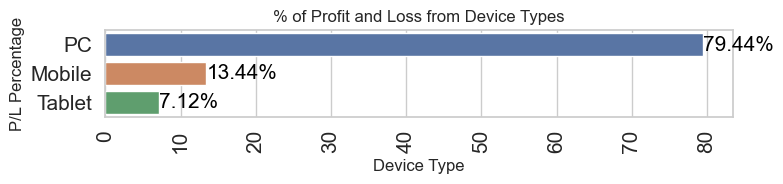

In [17]:

# Set the style of the seaborn plot to whitegrid
sns.set(style="whitegrid")

# Create a larger figure for the plot
plt.figure(figsize=(8, 2))
# Create a pivot table for Device_Type
Device_Type_pt = pd.pivot_table(df, values='Profit_Loss', index='device_type',
                             aggfunc='sum', fill_value=0,margins=True)
# Sort the pivot table in descending order
Device_Type_pt=Device_Type_pt.sort_values(by=['Profit_Loss'],ascending=False)
# Calculate the divisor based on the highest Profit_Loss value
divisor=Device_Type_pt.iloc[0]
# Divide the pivot table by the divisor and convert to percentages
Device_Type_pt=Device_Type_pt.divide(divisor)*100
# Remove the 'All' row
Device_Type_pt=Device_Type_pt.tail(-1)
# Create a bar plot using Seaborn
sns.barplot(data=Device_Type_pt, y=Device_Type_pt.index, x='Profit_Loss')
# Create a bar plot using Seaborn
for i, val in enumerate(Device_Type_pt.index):
    y = Device_Type_pt.loc[val].sum()
    plt.text(y, i+.2, str(round(y,2))+'%', ha="left",fontsize = 15,         color ='black')
# Customize the x-axis labels rotation, labels, and title
plt.xticks(rotation=90,fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel("Device Type")
plt.ylabel("P/L Percentage")
plt.title("% of Profit and Loss from Device Types")
plt.tight_layout()
plt.show()

We will try to undertand which device_type having more profit in yearly wise

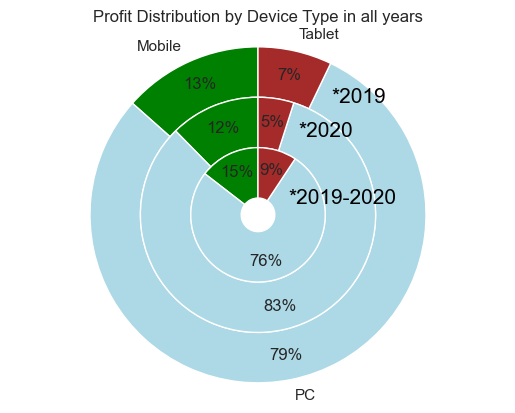

In [18]:
# Create a pivot table from the DataFrame 'df' to summarize profit/loss by device type and year
Device_Type__yearly_pt = pd.pivot_table(df, values='Profit_Loss', index='device_type',
                             aggfunc='sum', fill_value=0, margins=True, columns='year')

# Exclude the last row which is likely the 'All' row from the 'margins' parameter
Device_Type__yearly_pt = Device_Type__yearly_pt.head(-1)

# Create the first pie chart for the third column of the pivot table (latest year)
plt.pie(Device_Type__yearly_pt.iloc[:,2], labels=Device_Type__yearly_pt.index,
        autopct="%.0f%%", wedgeprops=dict(width=.3), radius=1,
       colors=['Green', 'lightblue', 'brown'], startangle=90, pctdistance=0.85);
plt.annotate('*2019', xy=(.6, .7), fontsize=15, ha='center', va='center', color='black')

# Create the second pie chart for the second column of the pivot table (middle year)
ax = plt.pie(Device_Type__yearly_pt.iloc[:,1], autopct="%.0f%%", wedgeprops=dict(width=.3), radius=.7,
             colors=['Green', 'lightblue', 'brown'], startangle=90, pctdistance=0.8);
plt.annotate('*2020', xy=(.4, .5), fontsize=15, ha='center', va='center', color='black')

# Create the third pie chart for the first column of the pivot table (earliest year)
ax = plt.pie(Device_Type__yearly_pt.iloc[:,0], autopct="%.0f%%", wedgeprops=dict(width=.3), radius=.4,
             startangle=90, pctdistance=0.7, colors=['Green', 'lightblue', 'brown']);

plt.annotate('*2019-2020', xy=(.5, .1), fontsize=15, ha='center', va='center', color='black')
# Set the title for the entire plot
plt.title('Profit Distribution by Device Type in all years');

# Set equal aspect ratio
plt.axis('equal')
# Show the plot
plt.show()



In [19]:
Country_PL_yearly=df[['country','year','Profit_Loss']]
Country_PL_yearly['Profit_Loss'] = Country_PL_yearly['Profit_Loss'] / 1000
#new_df.sort_values(['Profit_Loss','year'] ,ascending=False)

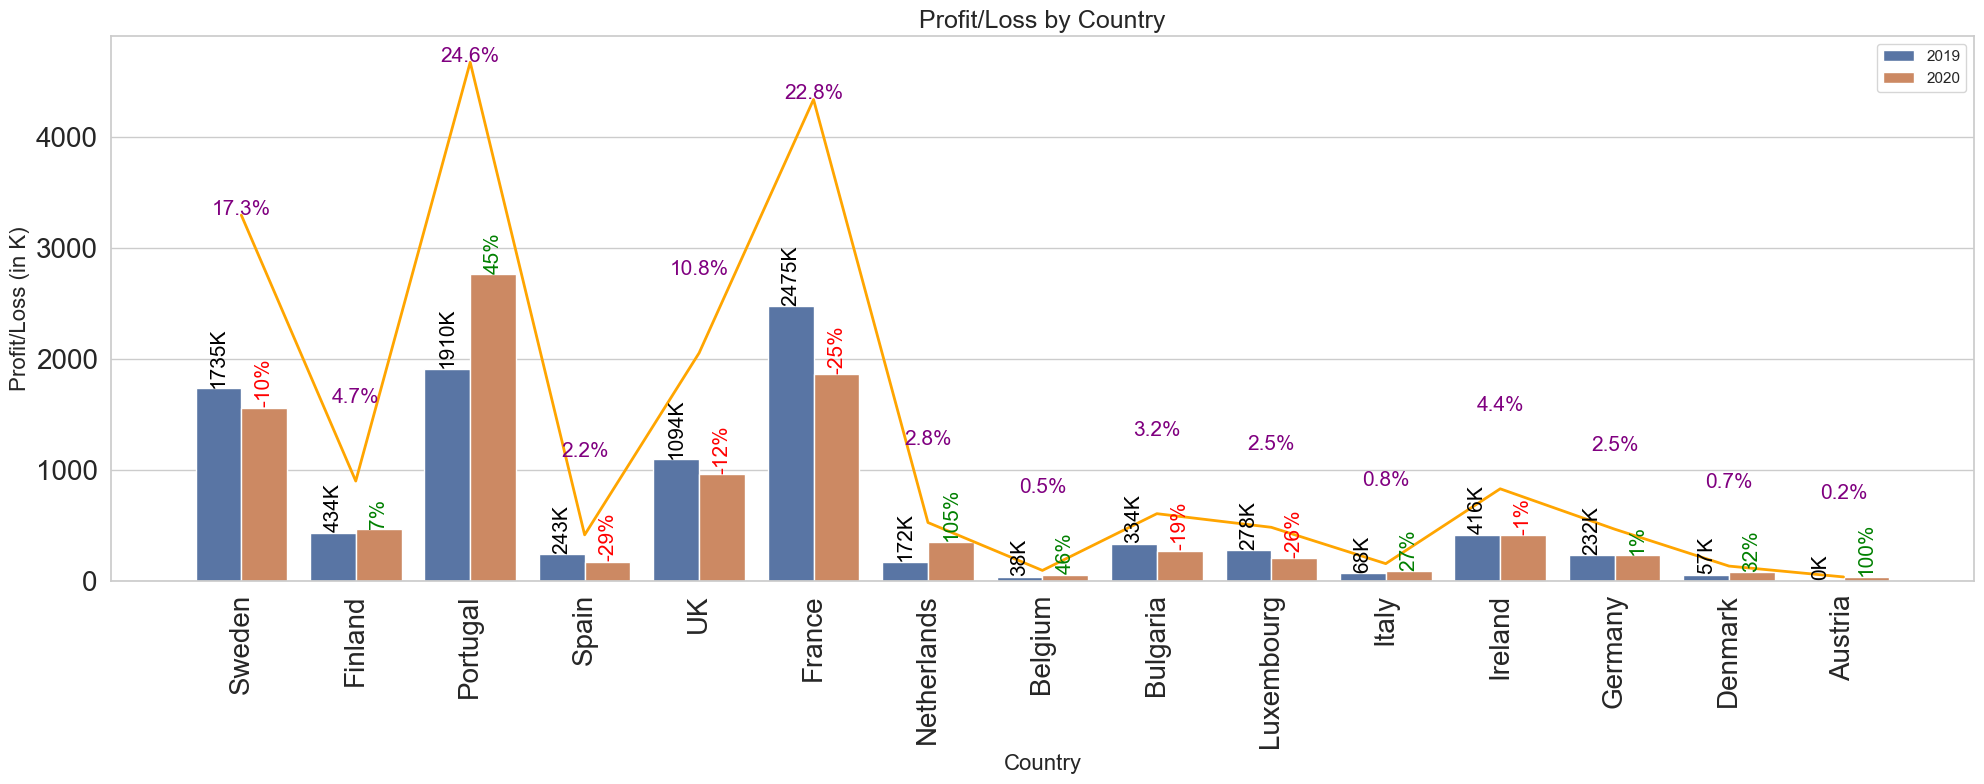

In [20]:

# Create a larger figure for the plot
plt.figure(figsize=(20, 8))

# Create the bar plot with hue for different years
sns.barplot(x='country', y='Profit_Loss', data=Country_PL_yearly, hue='year', estimator='sum', errorbar=None)

# Customize plot labels and title
plt.xlabel('Country', fontsize=16)
plt.ylabel('Profit/Loss (in K)', fontsize=16)
plt.title('Profit/Loss by Country', fontsize=18)
plt.xticks(rotation=90, fontsize=20)
plt.yticks(fontsize=20)
plt.legend(title='Year', fontsize=20)

# Add text labels to the bars
for i, country in enumerate(Country_PL_yearly['country'].unique()):
    for j, year in enumerate(Country_PL_yearly['year'].unique()):
        # Calculate profit/loss for specific country and year
        y = Country_PL_yearly[(Country_PL_yearly['country'] == country) & (Country_PL_yearly['year'] == year)]['Profit_Loss'].sum()
        # Calculate total profit/loss for specific country across all years
        z = Country_PL_yearly[Country_PL_yearly['country'] == country]['Profit_Loss'].sum()
        
        # Calculate the percentage change in profit/loss
        Chance_in_percentage = (y - (z - y)) * 100 / (z - y)
        
        # Display the text label with appropriate formatting
        plt.text(i - 0.2 if j == 1 else i + 0.2, y + 40,
                 f'{100 if str(y if j == 1 else Chance_in_percentage) == "inf" else Chance_in_percentage:.0f}%'
                 if j == 0 else
                 f'{y if j == 1 else Chance_in_percentage:.0f}K',
                 ha="center", fontsize=15,
                 color='green' if Chance_in_percentage > 0 and j == 0 else 'black' if j == 1 else 'red',
                 rotation=90)

# Calculate total profit
Total_profit = Country_PL_yearly['Profit_Loss'].sum()

# Create a separate line plot on the same axes
sns.lineplot(x='country', y='Profit_Loss', data=Country_PL_yearly, color='orange',
             linewidth=2, estimator='sum', errorbar=None)

# Add percentage text labels to the line plot
for i, country in enumerate(Country_PL_yearly['country'].unique()):
    # Calculate profit/loss for specific country
    y = Country_PL_yearly[Country_PL_yearly['country'] == country]['Profit_Loss'].sum()

    # Calculate percentage of total profit/loss for specific country
    output = round(y * 100 / Total_profit, 2)
    
    # Display the percentage label
    plt.text(i, y + 700 if output < 15 else y, f'{output:.1f}%', ha="center", fontsize=15, color='purple')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

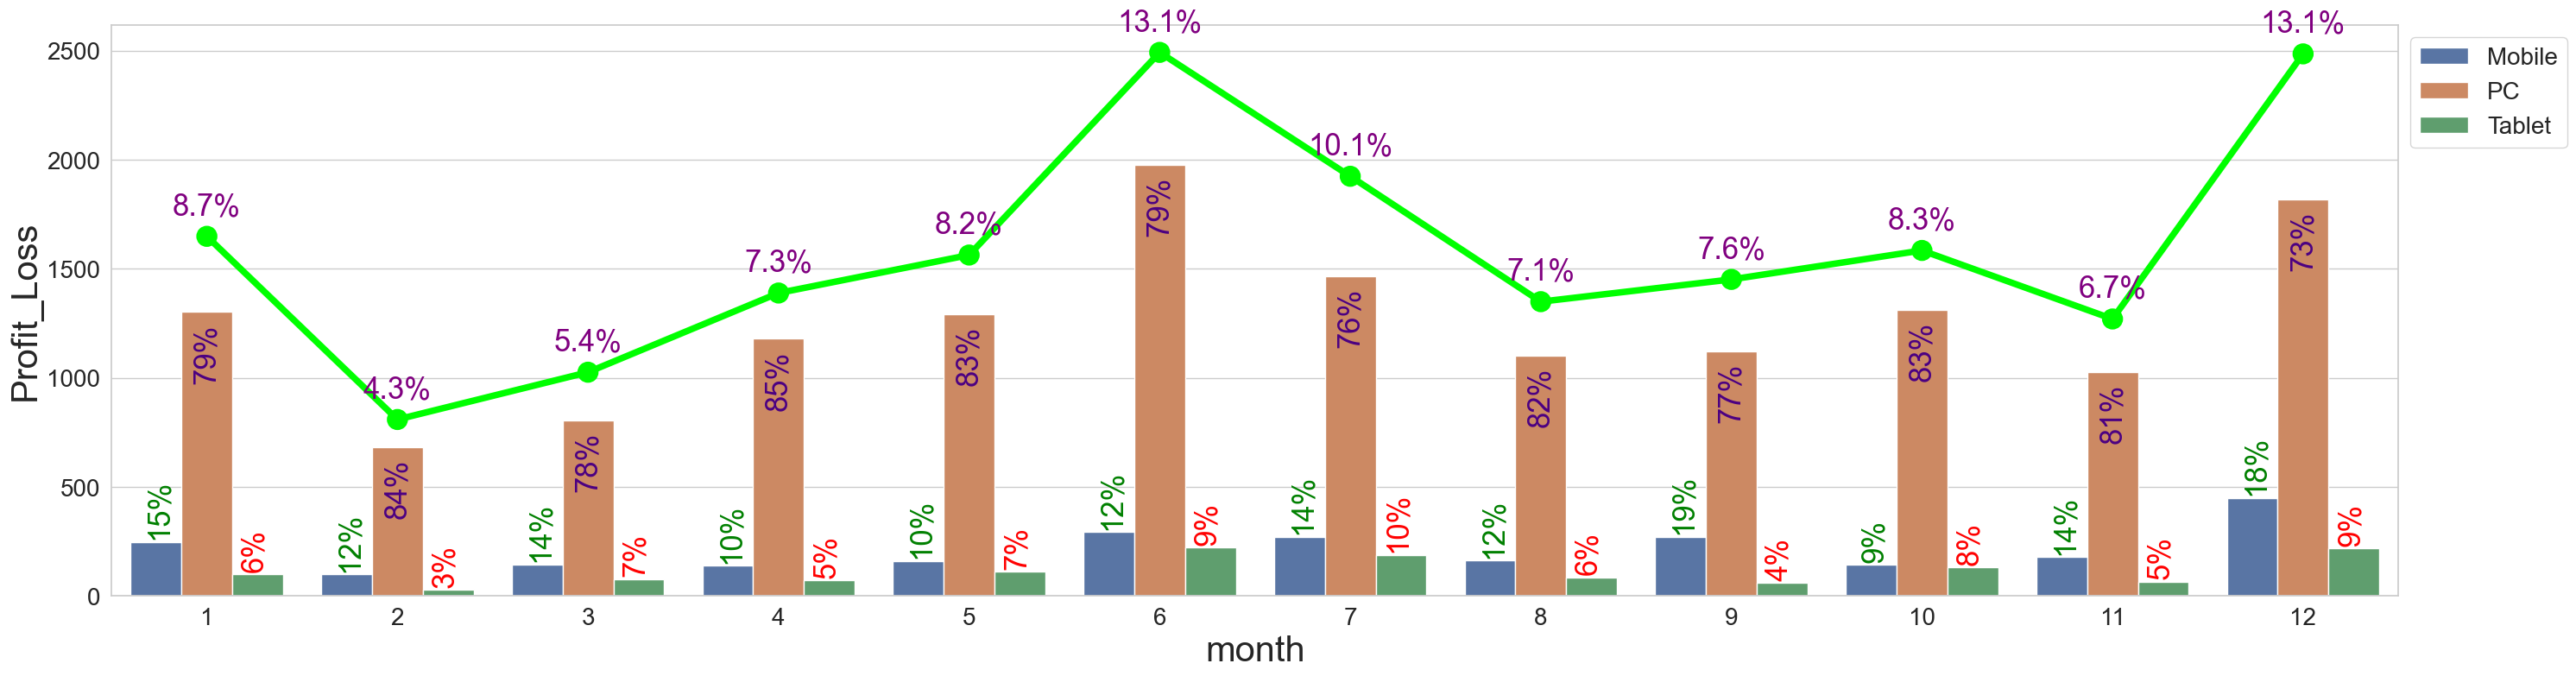

In [21]:
# Function to adjust x-axis position based on 'j'
def xaxis(j):
    if j == 0:
        return i - 0.25
    elif j == 2:
        return i + 0.25
    else:
        return i

# Function to set colors based on 'j'
def colors(j):
    if j == 0:
        return 'green'
    elif j == 1:
        return 'Indigo'
    else:
        return 'red'

# Set seaborn style to whitegrid
sns.set(style='whitegrid')

# Create a list of month names
labelnames = [calendar.month_name[i] for i in range(1, 13)]

# Create a larger figure for the plot
plt.figure(figsize=(30, 8))

# Prepare the data
DT_PL_monthly = df[['device_type', 'month', 'Profit_Loss']]
DT_PL_monthly['Profit_Loss'] = DT_PL_monthly['Profit_Loss'] / 1000

# Create a bar plot with hue for different device types
sns.barplot(x=DT_PL_monthly.month, y=DT_PL_monthly.Profit_Loss, hue=DT_PL_monthly.device_type,
            errorbar=None, estimator='sum')

# Add text labels to the bars
for i, month in enumerate(sorted(DT_PL_monthly['month'].unique())):
    for j, device_type in enumerate(DT_PL_monthly['device_type'].unique()):
        y = DT_PL_monthly[(DT_PL_monthly['month'] == month) & 
                          (DT_PL_monthly['device_type'] == device_type)]['Profit_Loss'].sum()
        z = DT_PL_monthly[(DT_PL_monthly['month'] == month)]['Profit_Loss'].sum()
        Chance_in_percentage = round(y * 100 / z)
        plt.text(xaxis(j), y - 300 if j == 1 else y + 40,
                 f'{Chance_in_percentage}%',
                 ha="center", fontsize=25,
                 color=colors(j), rotation=90)

# Customize plot elements
plt.legend(bbox_to_anchor=(1, 1), fontsize=20)
plt.xticks(range(0, 12), labels=labelnames, fontsize=20)
plt.yticks(fontsize=20)
plt.ylabel('Profit_Loss', fontsize=30)
plt.xlabel('Month', fontsize=30)

# Calculate total profit
Total_profit = DT_PL_monthly['Profit_Loss'].sum()

# Create a point plot to show percentage labels
sns.pointplot(x=DT_PL_monthly.month, y=DT_PL_monthly.Profit_Loss, data=DT_PL_monthly, errorbar=None,
              estimator='sum', scale=2, color='Lime')

# Add percentage text labels to the point plot
for i, month in enumerate(sorted(DT_PL_monthly['month'].unique())):
    y = DT_PL_monthly[DT_PL_monthly['month'] == month]['Profit_Loss'].sum()
    output = round(y * 100 / Total_profit, 2)
    plt.text(i, y + 100, f'{output:.1f}%', ha="center", fontsize=25, color='purple')

# Display the plot
plt.tight_layout()
plt.show()


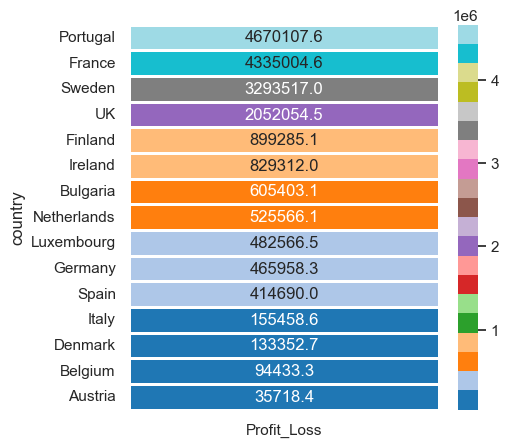

In [22]:
# Set the figure size for the plot
plt.figure(figsize=(5, 5))

# Create a pivot table to summarize profit/loss by country and year
Country_pt = pd.pivot_table(df, values='Profit_Loss', index='country', aggfunc='sum',
                             fill_value=0)

# Sort the pivot table by 'Profit_Loss' in descending order
Country_pt = Country_pt.sort_values(by=['Profit_Loss'], ascending=False)

# Create a heatmap using seaborn to visualize the pivot table
sns.heatmap(Country_pt, annot=True, linewidths=1, fmt=".1f", cmap="tab20")

# Display the plot
plt.show()

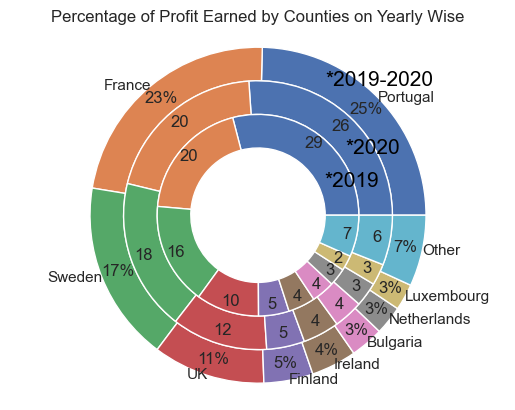

In [23]:
# Create a pivot table to summarize profit/loss by country
Country_pt = pd.pivot_table(df, values='Profit_Loss', index='country', aggfunc='sum',
                             fill_value=0)

# Sort the pivot table by 'Profit_Loss' in descending order
Country_pt = Country_pt.sort_values(by=['Profit_Loss'], ascending=False)

# Select the top 9 countries and group the rest as 'Other'
Country_pt_top9 = Country_pt.head(9)
Country_pt_top9.loc['Other'] = round(sum(Country_pt["Profit_Loss"].tail(-9)), 2)
Country_pt = Country_pt_top9

# Create the first pie chart for the overall country distribution
plt.pie(Country_pt.Profit_Loss, labels=Country_pt.index, autopct='%1.0f%%', labeldistance=1, pctdistance=.9,
        wedgeprops=dict(width=.5), radius=2.5, startangle=0)
plt.annotate('*2019-2020', xy=(1.8, 2), fontsize=15, ha='center', va='center', color='black')

# Create a pivot table to summarize profit/loss by country and year for 2019
Country_pt_2019 = pd.pivot_table(df[df.year == 2019], values='Profit_Loss', index='country', aggfunc='sum',
                                  fill_value=0)

# Sort the pivot table by 'Profit_Loss' in descending order
Country_pt_2019 = Country_pt_2019.sort_values(by=['Profit_Loss'], ascending=False)

# Select the top 9 countries and group the rest as 'Other'
Country_pt_2019_top9 = Country_pt_2019.head(9)
Country_pt_2019_top9.loc['Other'] = round(sum(Country_pt_2019["Profit_Loss"].tail(-9)), 2)
Country_pt_2019 = Country_pt_2019_top9

# Create the second pie chart for the country distribution in 2019
plt.pie(Country_pt_2019.Profit_Loss, autopct='%1.0f', labeldistance=1.4, pctdistance=.9,
        wedgeprops=dict(width=.5), radius=2, startangle=0)

plt.annotate('*2019', xy=(1.4, .5), fontsize=15, ha='center', va='center', color='black')

# Create a pivot table to summarize profit/loss by country and year for 2020
Country_pt_2020 = pd.pivot_table(df[df.year == 2020], values='Profit_Loss', index='country', aggfunc='sum',
                                  fill_value=0)

# Sort the pivot table by 'Profit_Loss' in descending order
Country_pt_2020 = Country_pt_2020.sort_values(by=['Profit_Loss'], ascending=False)

# Select the top 9 countries and group the rest as 'Other'
Country_pt_2020_top9 = Country_pt_2020.head(9)
Country_pt_2020_top9.loc['Other'] = round(sum(Country_pt_2020["Profit_Loss"].tail(-9)), 2)
Country_pt_2020 = Country_pt_2020_top9

# Create the third pie chart for the country distribution in 2020
plt.pie(Country_pt_2020.Profit_Loss, autopct='%1.0f', labeldistance=1.4, pctdistance=.9,
        wedgeprops=dict(width=.5), radius=1.5, startangle=0)

plt.annotate('*2020', xy=(1.7, 1), fontsize=15, ha='center', va='center', color='black')


# Set equal aspect ratio
plt.axis('equal')

# Add a legend with custom labels
plt.title("Percentage of Profit Earned by Counties on Yearly Wise")

# Display the plot
plt.show()


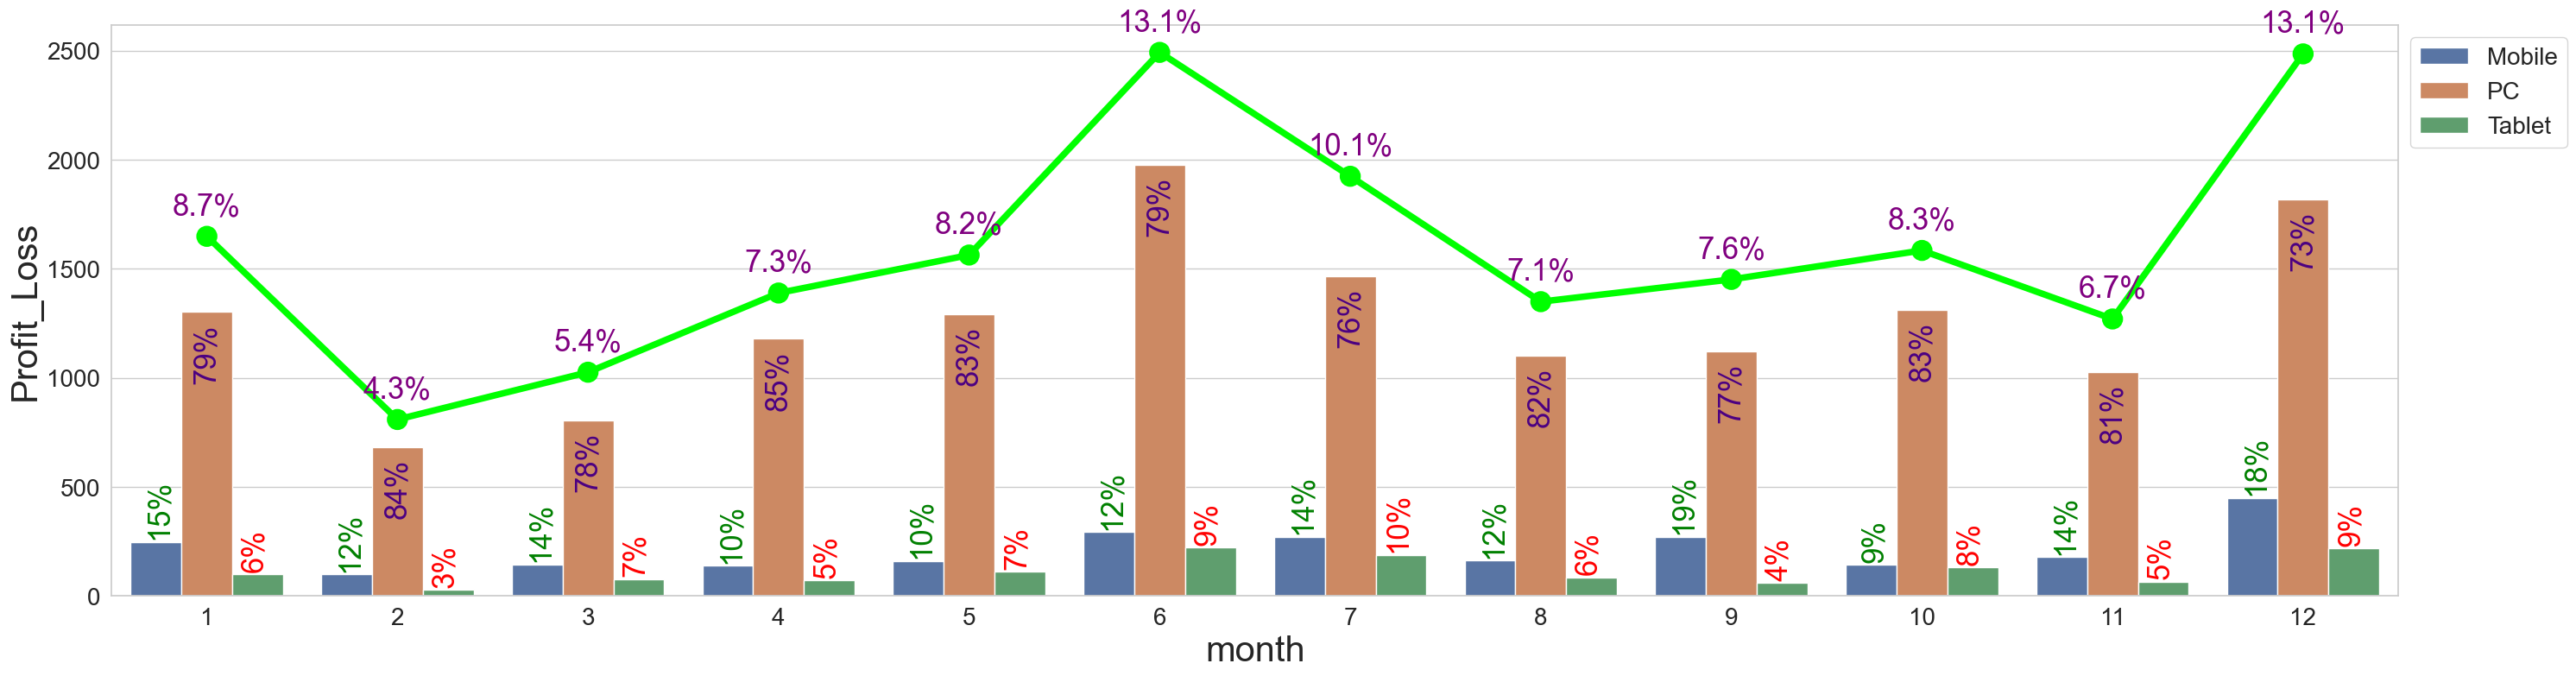

In [24]:
# Function to adjust x-axis position based on 'j'
def xaxis(j):
    if j == 0:
        return i - 0.25
    elif j == 2:
        return i + 0.25
    else:
        return i

# Function to set colors based on 'j'
def colors(j):
    if j == 0:
        return 'green'
    elif j == 1:
        return 'Indigo'
    else:
        return 'red'

# Set seaborn style to whitegrid
sns.set(style='whitegrid')

# Create a list of month names
labelnames = [calendar.month_name[i] for i in range(1, 13)]

# Create a larger figure for the plot
plt.figure(figsize=(30, 8))

# Prepare the data
DT_PL_monthly = df[['device_type', 'month', 'Profit_Loss']]
DT_PL_monthly['Profit_Loss'] = DT_PL_monthly['Profit_Loss'] / 1000

# Create a bar plot with hue for different device types
sns.barplot(x=DT_PL_monthly.month, y=DT_PL_monthly.Profit_Loss, hue=DT_PL_monthly.device_type,
            errorbar=None, estimator='sum')

# Add text labels to the bars
for i, month in enumerate(sorted(DT_PL_monthly['month'].unique())):
    for j, device_type in enumerate(DT_PL_monthly['device_type'].unique()):
        y = DT_PL_monthly[(DT_PL_monthly['month'] == month) & 
                          (DT_PL_monthly['device_type'] == device_type)]['Profit_Loss'].sum()
        z = DT_PL_monthly[(DT_PL_monthly['month'] == month)]['Profit_Loss'].sum()
        Chance_in_percentage = round(y * 100 / z)
        plt.text(xaxis(j), y - 300 if j == 1 else y + 40,
                 f'{Chance_in_percentage}%',
                 ha="center", fontsize=25,
                 color=colors(j), rotation=90)

# Customize plot elements
plt.legend(bbox_to_anchor=(1, 1), fontsize=20)
plt.xticks(range(0, 12), labels=labelnames, fontsize=20)
plt.yticks(fontsize=20)
plt.ylabel('Profit_Loss', fontsize=30)
plt.xlabel('Month', fontsize=30)

# Calculate total profit
Total_profit = DT_PL_monthly['Profit_Loss'].sum()

# Create a point plot to show percentage labels
sns.pointplot(x=DT_PL_monthly.month, y=DT_PL_monthly.Profit_Loss, data=DT_PL_monthly, errorbar=None,
              estimator='sum', scale=2, color='Lime')

# Add percentage text labels to the point plot
for i, month in enumerate(sorted(DT_PL_monthly['month'].unique())):
    y = DT_PL_monthly[DT_PL_monthly['month'] == month]['Profit_Loss'].sum()
    output = round(y * 100 / Total_profit, 2)
    plt.text(i, y + 100, f'{output:.1f}%', ha="center", fontsize=25, color='purple')

# Display the plot
plt.tight_layout()
plt.show()


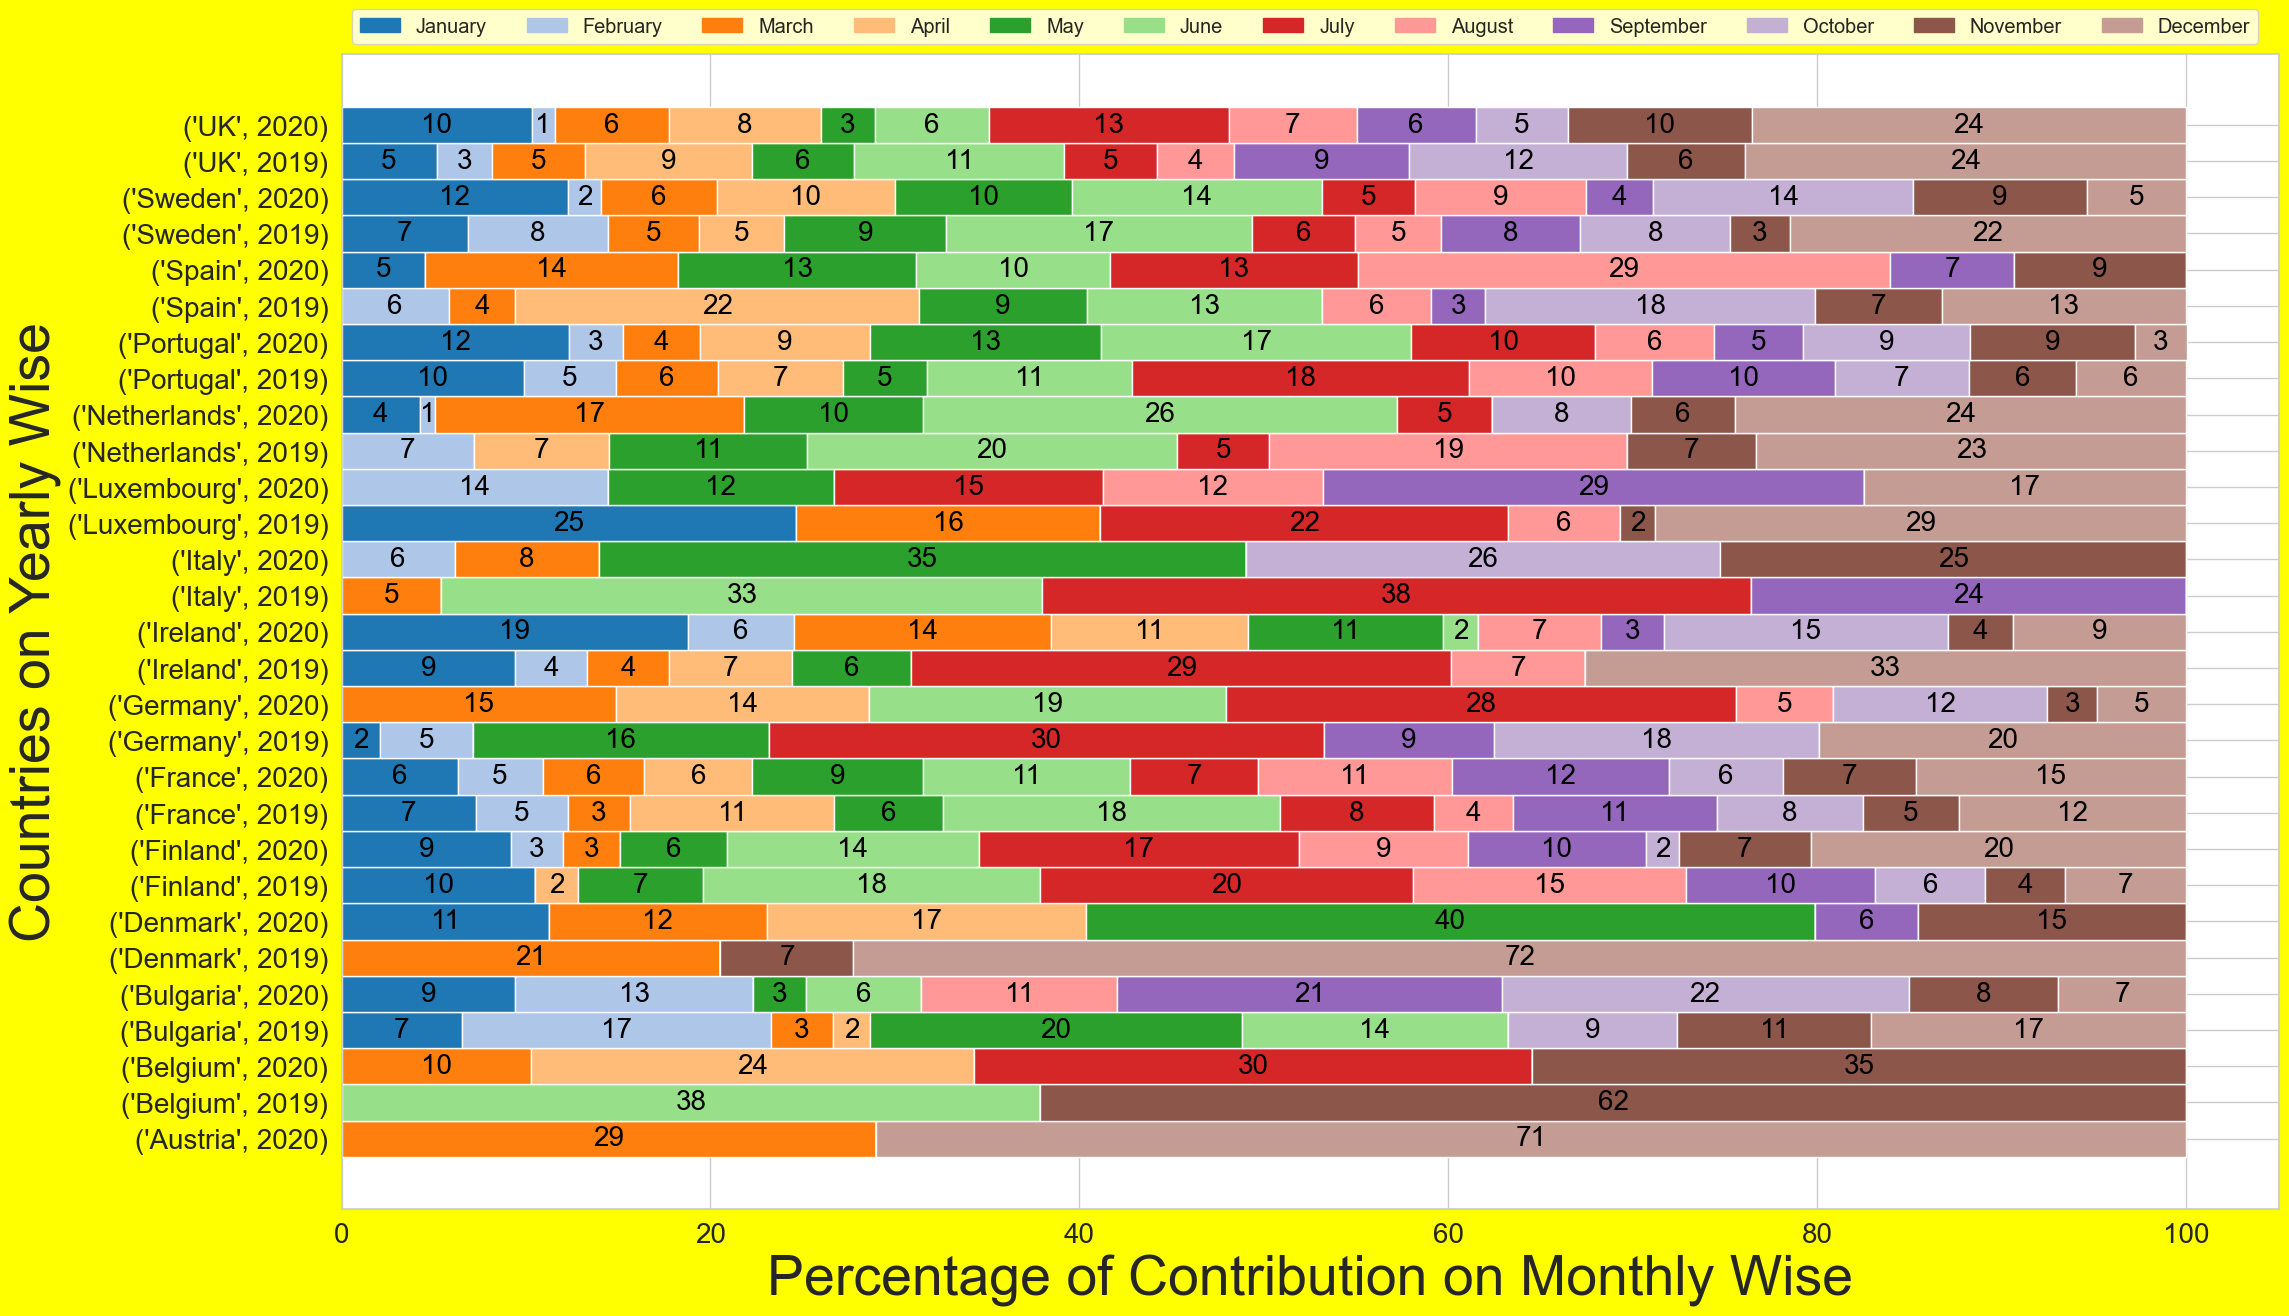

In [25]:
# Create a pivot table for monthly profit by country and year
Countries_wise_Monthly_Profit = pd.pivot_table(df, values='Profit_Loss', index=['country', 'year'],
                                               columns=["month"], aggfunc='sum', fill_value=0, margins=True)

# Calculate percentage contribution for each month
for i in Countries_wise_Monthly_Profit.columns:
    Countries_wise_Monthly_Profit[i] = round(Countries_wise_Monthly_Profit[i] * 100 / Countries_wise_Monthly_Profit['All'], 2).values

# Drop the 'All' column and row
Countries_wise_Monthly_Profit.drop("All", axis=1, inplace=True)
Countries_wise_Monthly_Profit.drop("All", inplace=True)

# Prepare data for plotting
labelnames = [calendar.month_name[i] for i in range(1, 13)]
results = {}
for i in range(Countries_wise_Monthly_Profit.shape[0]):
    results[Countries_wise_Monthly_Profit.index[i]] = Countries_wise_Monthly_Profit.loc[Countries_wise_Monthly_Profit.index[i]].values.tolist()

labels = list(results.keys())
data = np.array(list(results.values()))
data_cum = data.cumsum(axis=1)

# Create the figure and axis
fig, ax = plt.subplots(figsize=(25, 15))
fig.set_facecolor('yellow')

# Define color palette and legend patches
palette = sns.color_palette("tab20", 12)
colors = palette
legend_patches = [mpatches.Patch(color=color, label=label) for color, label in zip(colors, labelnames)]

# Plot horizontal stacked bars
for i in range(len(labels)):
    widths = data[i]
    starts = data_cum[i] - widths
    rects = ax.barh(str(labels[i]), widths, left=starts, height=1, color=colors)
    for rect, width in zip(rects, widths):
        if width != 0:
            label = f"{width:.0f}"
            ax.text(rect.get_x() + rect.get_width() / 2, rect.get_y() + rect.get_height() / 2,
                    label, ha='center', va='center', color='black',
                    fontsize=20 if width != 0 else 0)
        else:
            rect.set_width(0)

# Customize plot elements
ax.legend(handles=legend_patches, bbox_to_anchor=(0, 1), loc='lower left', fontsize='large', ncol=len(labelnames))
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylabel("Countries on Yearly Wise", fontsize=40)
plt.xlabel("Percentage of Contribution on Monthly Wise", fontsize=40)

# Display the plot
plt.show()

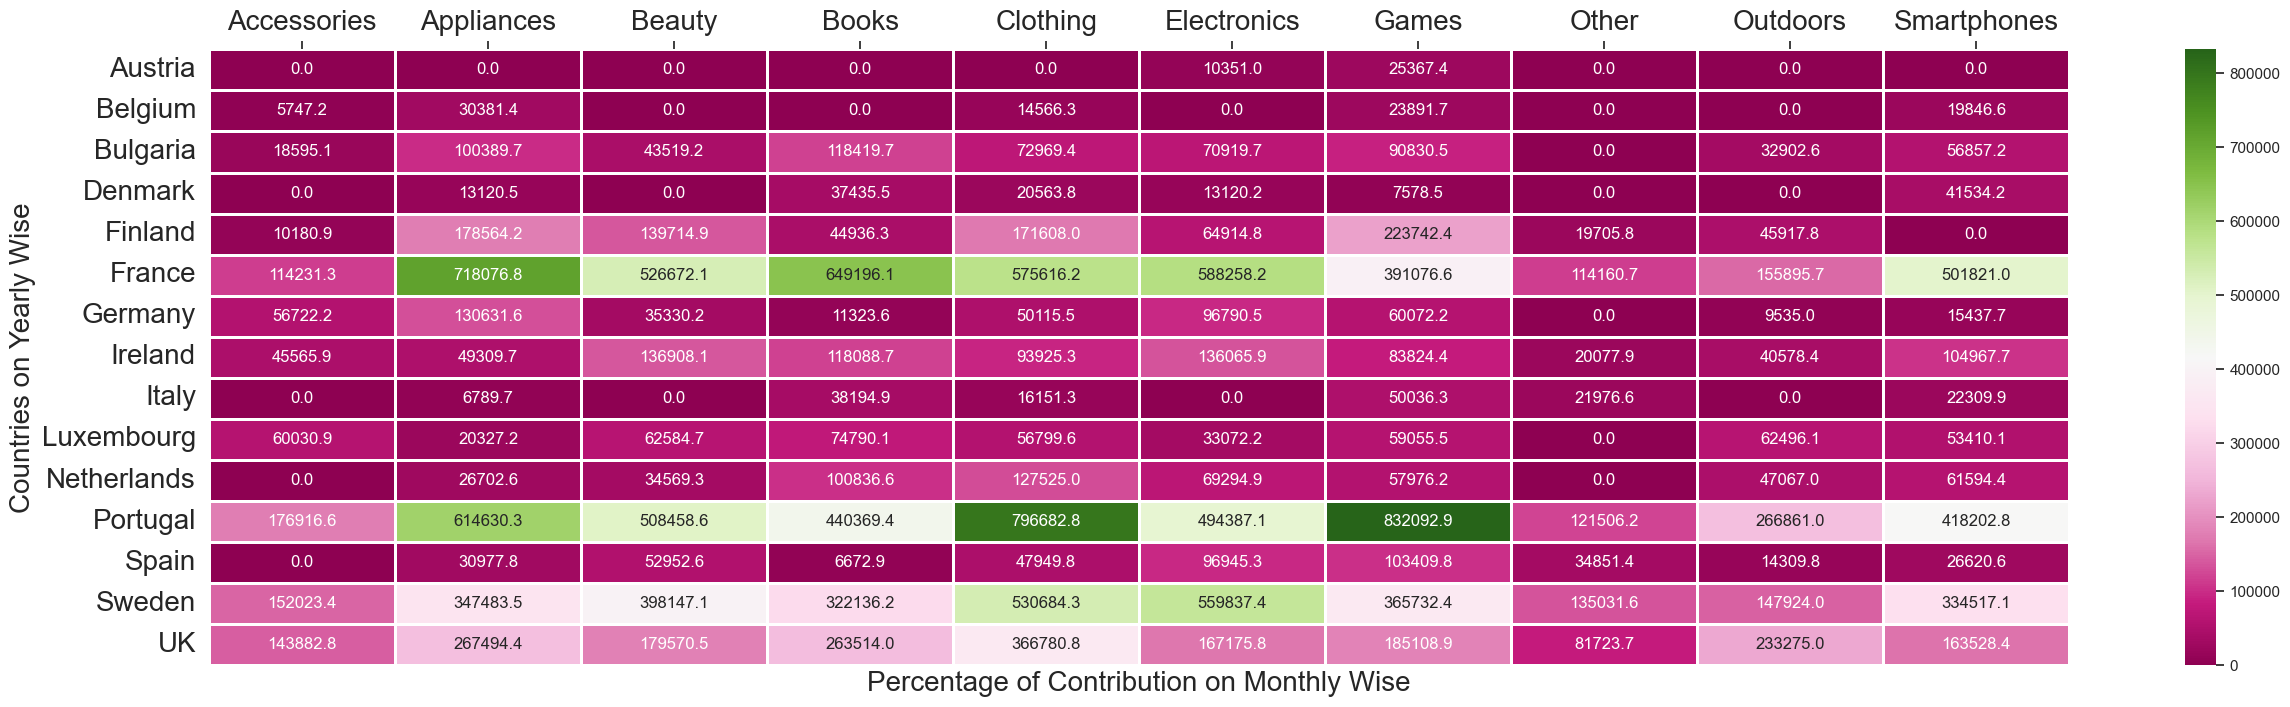

In [26]:
# Set the figure size
plt.figure(figsize=(30, 8))

# Create a pivot table for monthly profit by country and category
Countries_wise_Monthly_Profit = pd.pivot_table(df, values='Profit_Loss', index=['country'],
                                               columns=["category"], aggfunc='sum', fill_value=0, margins=True)

# Drop the 'All' column and row
Countries_wise_Monthly_Profit.drop("All", axis=1, inplace=True)
Countries_wise_Monthly_Profit.drop("All", inplace=True)

# Create a heatmap with annotations
ax = sns.heatmap(Countries_wise_Monthly_Profit, annot=True, fmt=".1f", linewidths=1, cmap="PiYG")

# Place x-axis ticks at the top
ax.xaxis.tick_top()

# Customize tick labels and labels
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylabel("Countries on Yearly Wise", fontsize=20)
plt.xlabel("Percentage of Contribution on Monthly Wise", fontsize=20)

# Display the plot
plt.show()

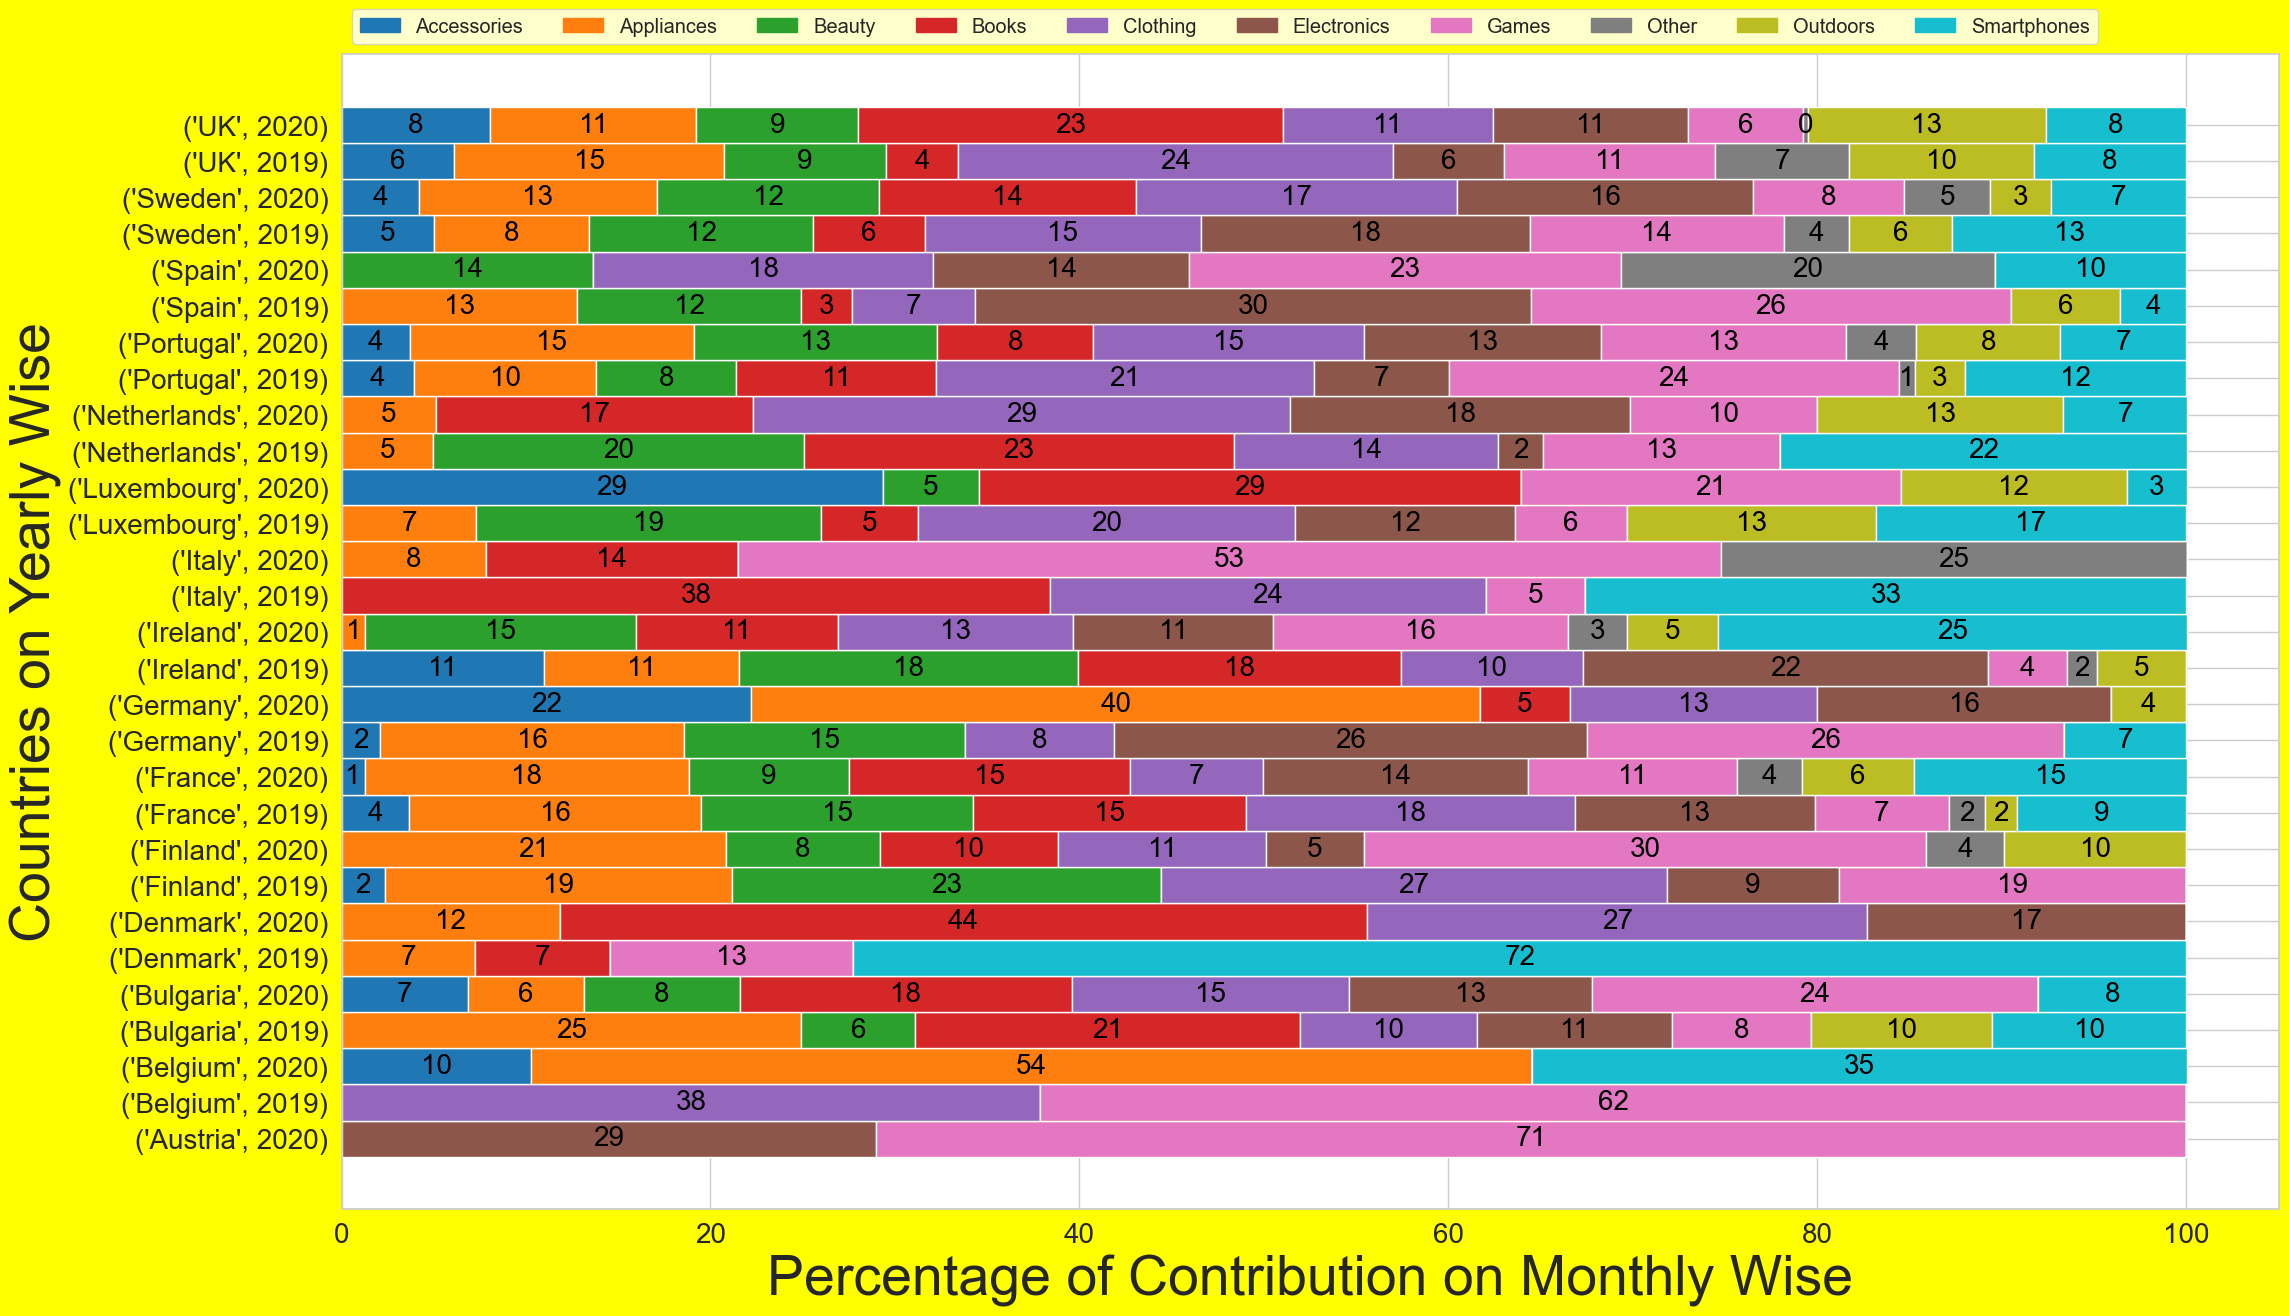

In [27]:
# Create a pivot table for yearly profit by country and category
Countries_wise_Monthly_Profit = pd.pivot_table(df, values='Profit_Loss', index=["country", 'year'],
                                               columns="category", aggfunc='sum', fill_value=0, margins=True)

# Calculate percentage contribution for each category
for i in Countries_wise_Monthly_Profit.columns:
    Countries_wise_Monthly_Profit[i] = round(Countries_wise_Monthly_Profit[i] * 100
                                             / Countries_wise_Monthly_Profit['All'], 2).values

# Drop the 'All' column and row
Countries_wise_Monthly_Profit.drop("All", axis=1, inplace=True)
Countries_wise_Monthly_Profit.drop("All", inplace=True)

# Prepare data for plotting
labelnames = [i for i in Countries_wise_Monthly_Profit.columns]
results = {}
for i in range(Countries_wise_Monthly_Profit.shape[0]):
    results[Countries_wise_Monthly_Profit.index[i]] = Countries_wise_Monthly_Profit.loc[
        Countries_wise_Monthly_Profit.index[i]].values.tolist()

labels = list(results.keys())
data = np.array(list(results.values()))
data_cum = data.cumsum(axis=1)

# Create the figure and axis
fig, ax = plt.subplots(figsize=(25, 15))
fig.set_facecolor('yellow')

# Define color palette and legend patches
palette = sns.color_palette("tab10", 12)
colors = palette
legend_patches = [mpatches.Patch(color=color, label=label) for color, label in zip(colors, labelnames)]

# Plot horizontal stacked bars
for i in range(len(labels)):
    widths = data[i]
    starts = data_cum[i] - widths
    rects = ax.barh(str(labels[i]), widths, left=starts, height=1, color=colors)
    
    for rect, width in zip(rects, widths):
        if width != 0:
            label = f"{width:.0f}"  # Format the label to two decimal places
            ax.text(rect.get_x() + rect.get_width() / 2, rect.get_y() + rect.get_height() / 2,
                    label, ha='center', va='center', color='black',
                    fontsize=20 if width != 0 else 0)  # Set font size
        else:
            rect.set_width(0)  # Set the width of zero-value bars to zero
            
# Customize plot elements
ax.legend(handles=legend_patches, bbox_to_anchor=(0, 1), loc='lower left', fontsize='large', ncol=len(labelnames))
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylabel("Countries on Yearly Wise", fontsize=40)
plt.xlabel("Percentage of Contribution on Monthly Wise", fontsize=40)

# Display the plot
plt.show()


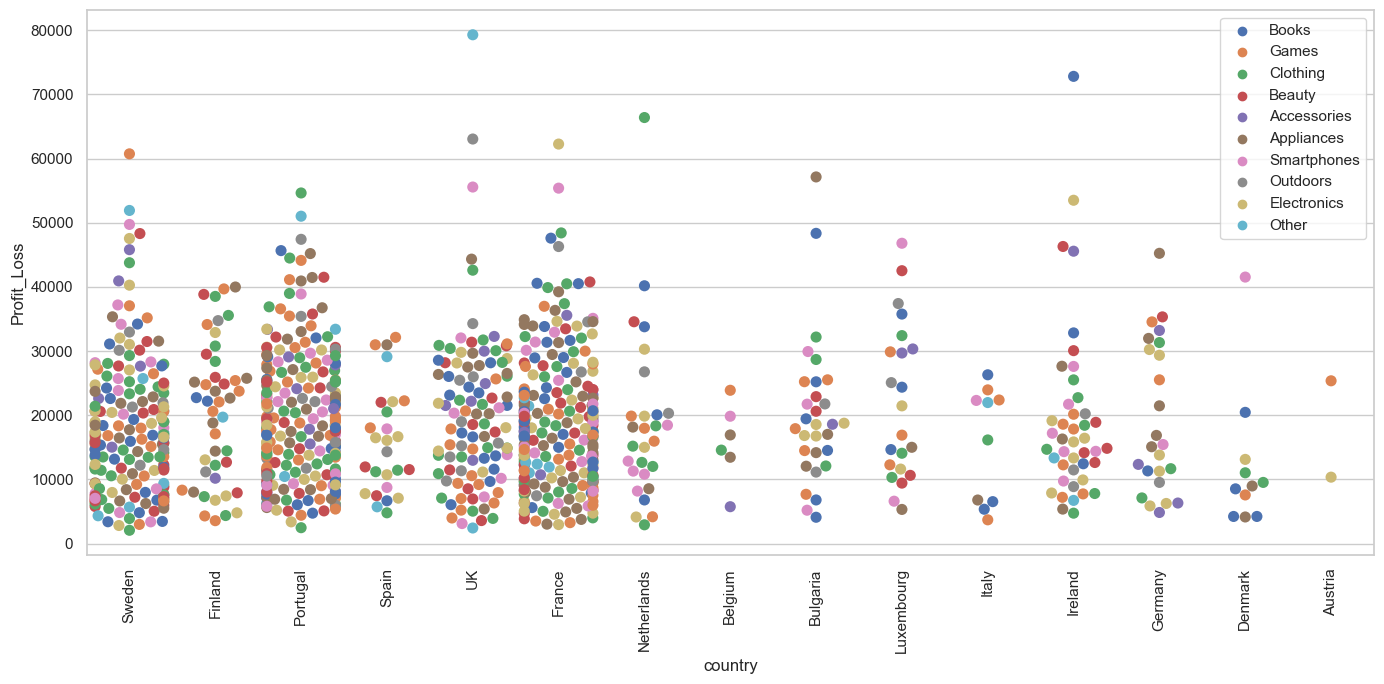

In [28]:
# Set the style of the seaborn plot
sns.set(style='whitegrid')

# Create a figure with the specified size
plt.figure(figsize=(14, 7))

# Create a swarm plot with profit/loss on the y-axis, countries on the x-axis, and hue by category
sns.swarmplot(y=df['Profit_Loss'], x=df['country'], hue=df["category"], size=8)

# Add legend outside the plot
plt.legend(bbox_to_anchor=(1, 1))

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Adjust layout for better visualization
plt.tight_layout()

# Display the plot
plt.show()


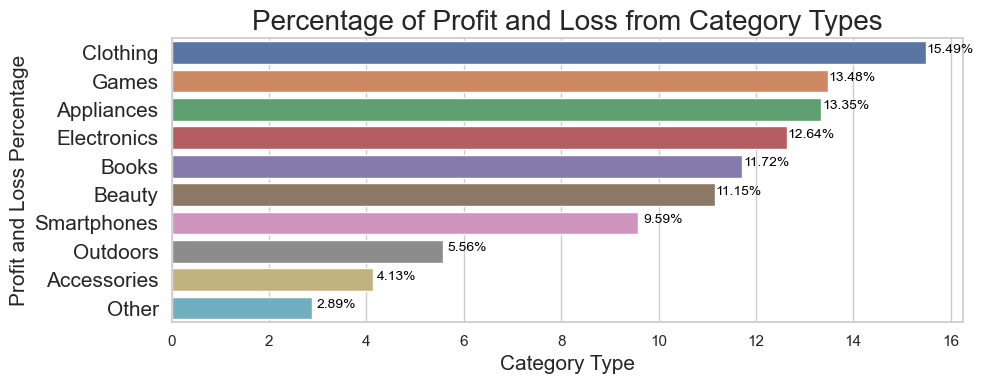

In [29]:
# Calculate pivot table with profit/loss percentage by category
pivot_table = pd.pivot_table(df, values='Profit_Loss', index='category', aggfunc='sum', fill_value=0, margins=True)
pivot_table = pivot_table.sort_values(by=['Profit_Loss'], ascending=False)
divisor = pivot_table.iloc[0]
pivot_table = pivot_table.divide(divisor) * 100
pivot_table = pivot_table.tail(-1)

# Set the style of the seaborn plot
sns.set(style='whitegrid')

# Create a figure with the specified size
plt.figure(figsize=(10, 4))

# Create a bar plot using seaborn
sns.barplot(data=pivot_table, y=pivot_table.index, x='Profit_Loss')

# Add text labels to the bars
for i, val in enumerate(pivot_table.index):
    y = pivot_table.loc[val].sum()
    plt.text(y + 0.5, i, str(round(y, 2)) + '%', ha="center", fontsize=10, color='black')

# Customize plot elements
plt.yticks(fontsize=15)
plt.xlabel("Category Type", fontsize=15)
plt.ylabel("Profit and Loss Percentage", fontsize=15)
plt.title("Percentage of Profit and Loss from Category Types", fontsize=20)
plt.tight_layout()

# Display the plot
plt.show()


In [30]:
def Individual_Statatics(n=None):
    plt.figure(figsize=(30, 15))
    
    # Define the DataFrame for sales data based on the specified year (n)
    Sales = 'Sales_data_' + str(n)
    Sales = pd.pivot_table(df[df['year'] == n] if n is not None else df, values='Profit_Loss',
                           index='sales_manager', columns='sales_rep', fill_value=0, margins=True, aggfunc='sum')
    
    # Define color palette
    colors = sns.color_palette("Set3", n_colors=100)

    # Calculate percentage of profit/loss by dividing by the 'All' column
    Sales = round(Sales.div(Sales['All'], axis=0) * 100, 2)
    Sales.drop('All', axis=1, inplace=True)
    Sales.drop('All', axis=0, inplace=True)

    # Calculate cumulative data for stacked bars
    cumulative_data = Sales.cumsum(axis=1)

    # Create the stacked bar plot for each category (sales representative)
    for i, category in enumerate(Sales.columns):
        sns.barplot(
            x=Sales.index,
            y=Sales[category],
            color=colors[i],
            bottom=cumulative_data.iloc[:, i] - Sales[category]
        )
        
        # Add labels to the bars
        for j, value in enumerate(Sales[category]):
            bar_center = cumulative_data.iloc[j, i] - value / 2
            plt.text(j, bar_center, s=(str(category) + '\n' + str(value) + '%' if value != 0 else ''),
                     color='black', ha='center', va='center', fontsize=20)

    # Customize plot elements
    plt.xticks(rotation=90, fontsize=30)
    plt.yticks(fontsize=30)
    plt.xlabel("Sales Manager on Sales Representative", fontsize=30)
    plt.ylabel("Profit and Loss Percentage", fontsize=30)
    plt.title(f"Percentage of Profit and Loss from sales_rep on {'2019-2020' if n is None else n}", fontsize=30)
    plt.tight_layout()
    plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
    
    # Display the plot
    plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


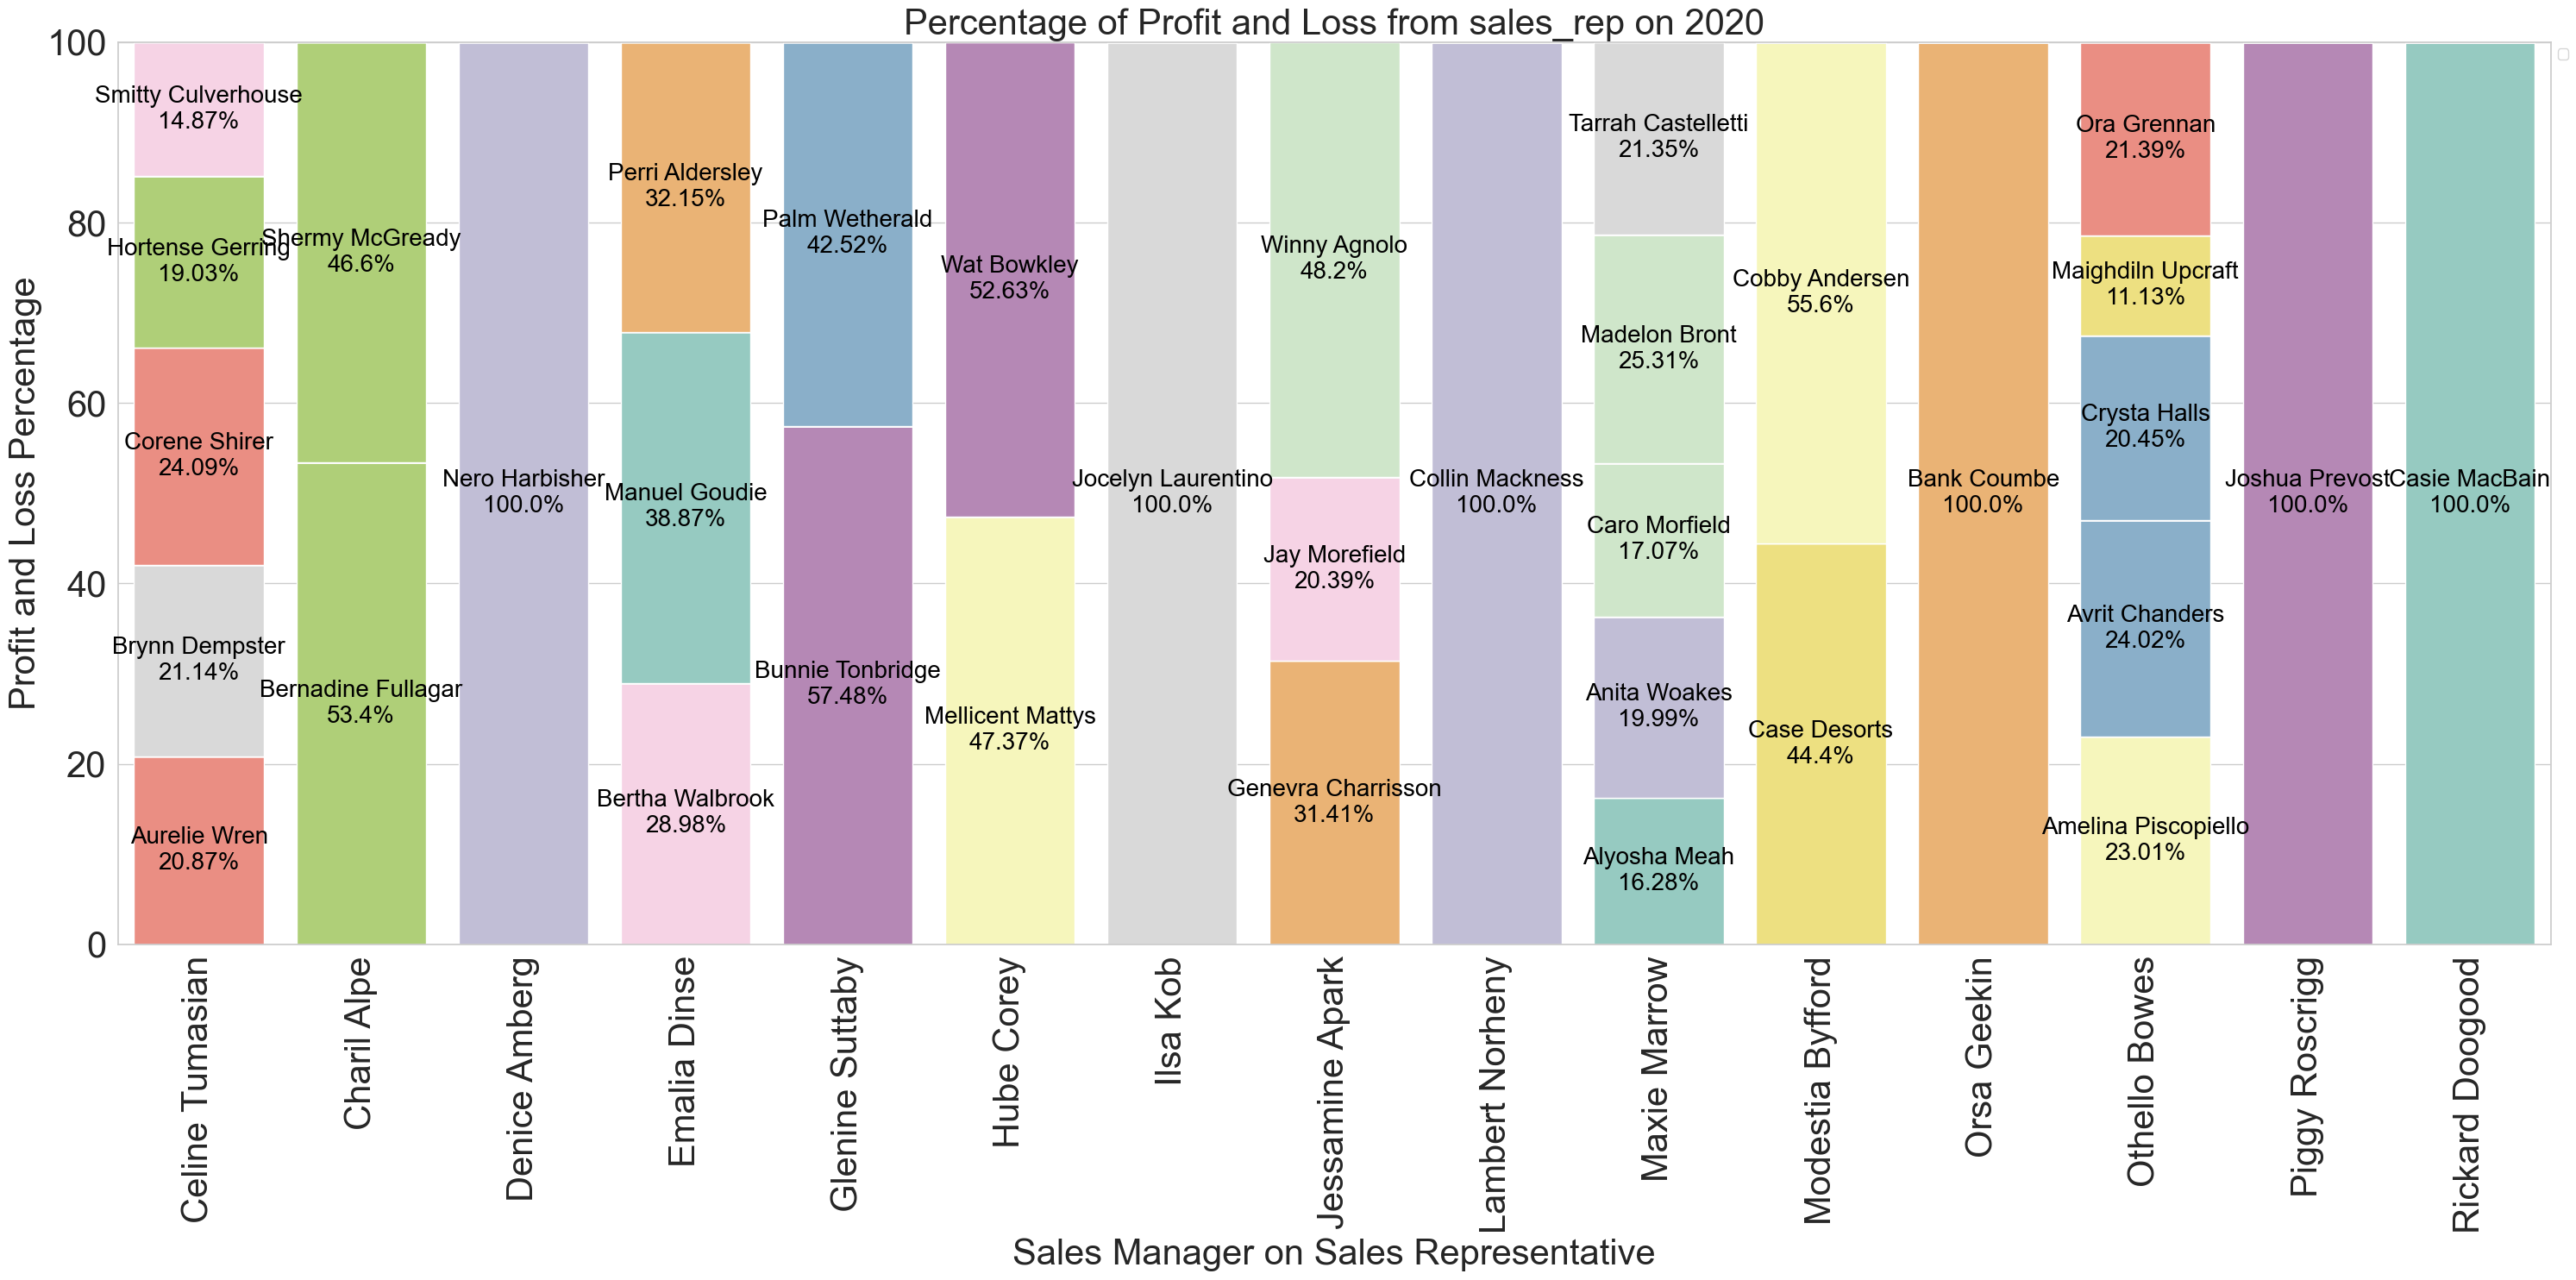

In [31]:
Individual_Statatics(2020)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


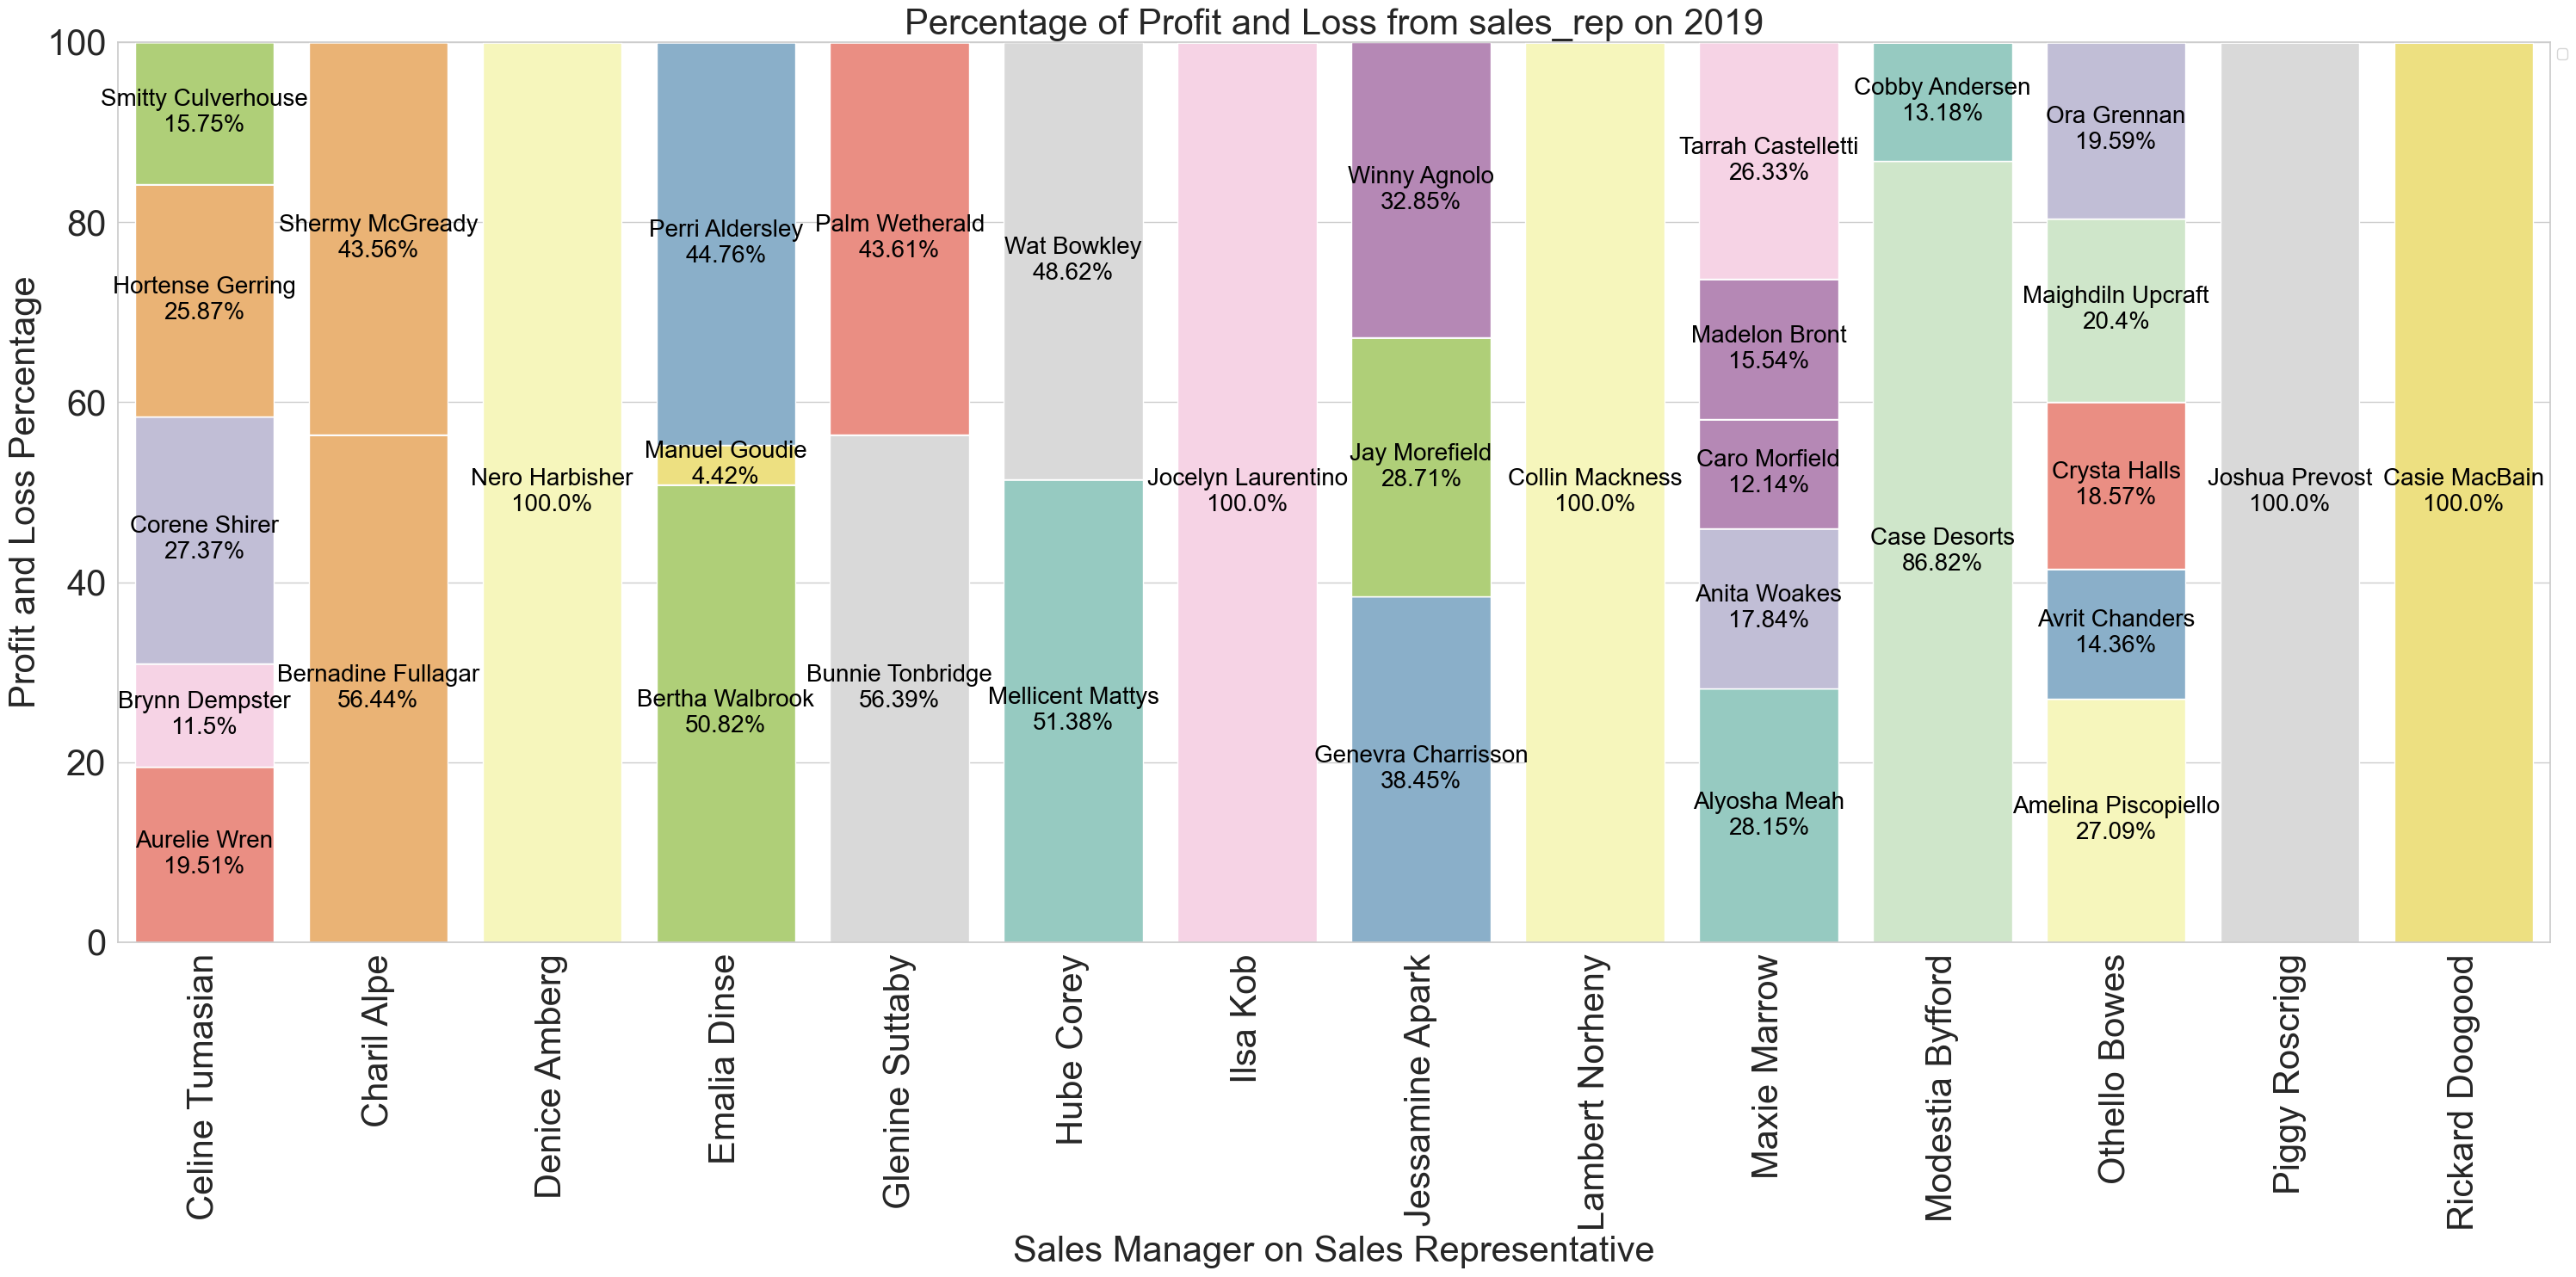

In [32]:
Individual_Statatics(2019)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


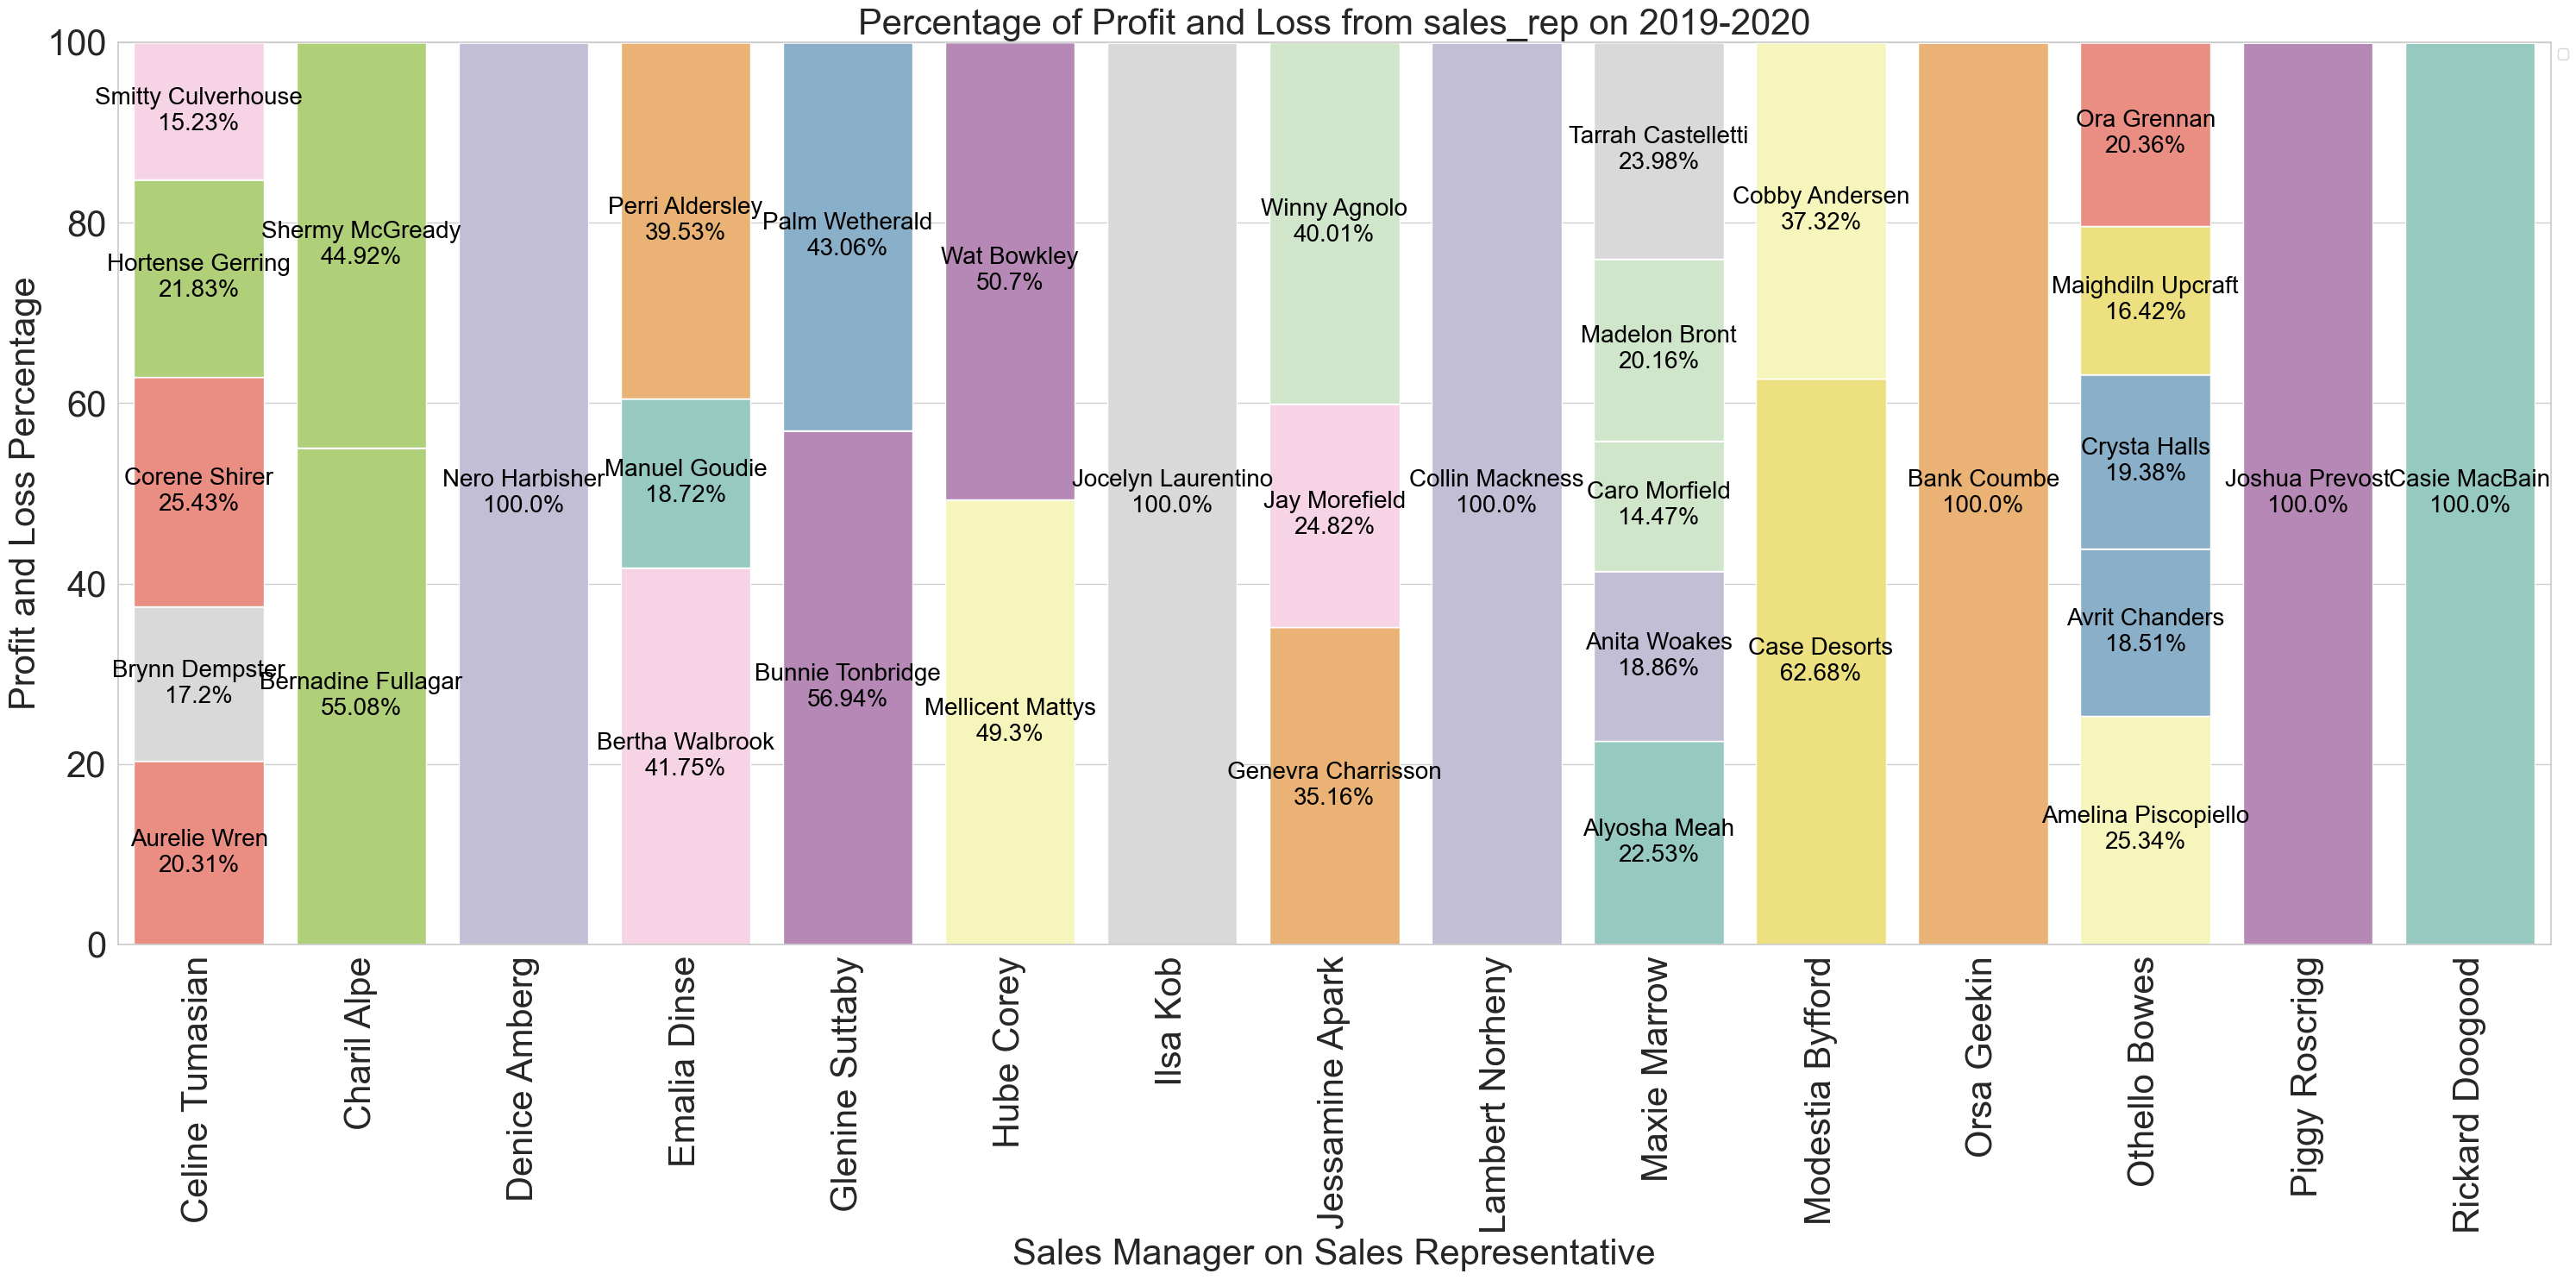

In [33]:
Individual_Statatics()